# Compare instantaneous hub-height velocity plots

In [1]:
# Load the libraries                                                                                                                        
import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, sys
import pickle
import pandas as pd
#from netCDF4 import Dataset
import glob

import yaml as yaml
Loader=yaml.safe_load

# Make all plots inline 
%matplotlib inline

In [2]:
# Load the right version of urllib and urlretrieve
if sys.version_info[0] < 3: 
    import urllib
    urlretrieve = urllib.urlretrieve
else:
    import urllib.request
    urlretrieve = urllib.request.urlretrieve

In [3]:
def loadyamldef(yamlfile, extradict={}):
    with open(yamlfile) as f:
        returndict = Loader(f)
    # Get the path to yamlfile
    dirpath = os.path.dirname(yamlfile)
    returndict['dirpath'] = dirpath
    # override any entries in the file
    for k,g in extradict.items():
        returndict[k] = g
    return returndict

def downloadFileIfNeeded(dirpath, filename, urlpath, verbose=True):
    fullfilename = os.path.join(dirpath, filename)
    if os.path.exists(fullfilename):
        if verbose: print('Found '+fullfilename)
        return fullfilename
    else:
        if verbose: print("Downloading "+urlpath)
        urlretrieve(urlpath, fullfilename)
    return fullfilename

In [4]:
def loadPickle(picklefname):
    pfile = open(picklefname, 'rb')
    db   = pickle.load(pfile)
    x    = db['x']
    y    = db['y']
    z    = db['z']
    vx   = db['vx']
    vy   = db['vy']
    vz   = db['vz']
    pfile.close()
    return x, y, z, vx, vy, vz

In [11]:
# Edit this list to include data
#           YAML file,                                                dictionary with extra labels and stuff
datasets = [
            ['DATA_Summit_amrwind_bananasrun1/DATA_Summit_unstable.yaml', {}],
]

In [12]:
datadefs = []
for data in datasets:
    datadefs.append(loadyamldef(data[0], extradict=data[1]))

Found DATA_Summit_amrwind_bananasrun1/DATA_Summit_unstable_bananas1_KP_z90_noturb_inst_900.pkl
Found DATA_Summit_amrwind_bananasrun1/DATA_Summit_unstable_bananas1_KP_z90_wturb_inst_900.pkl


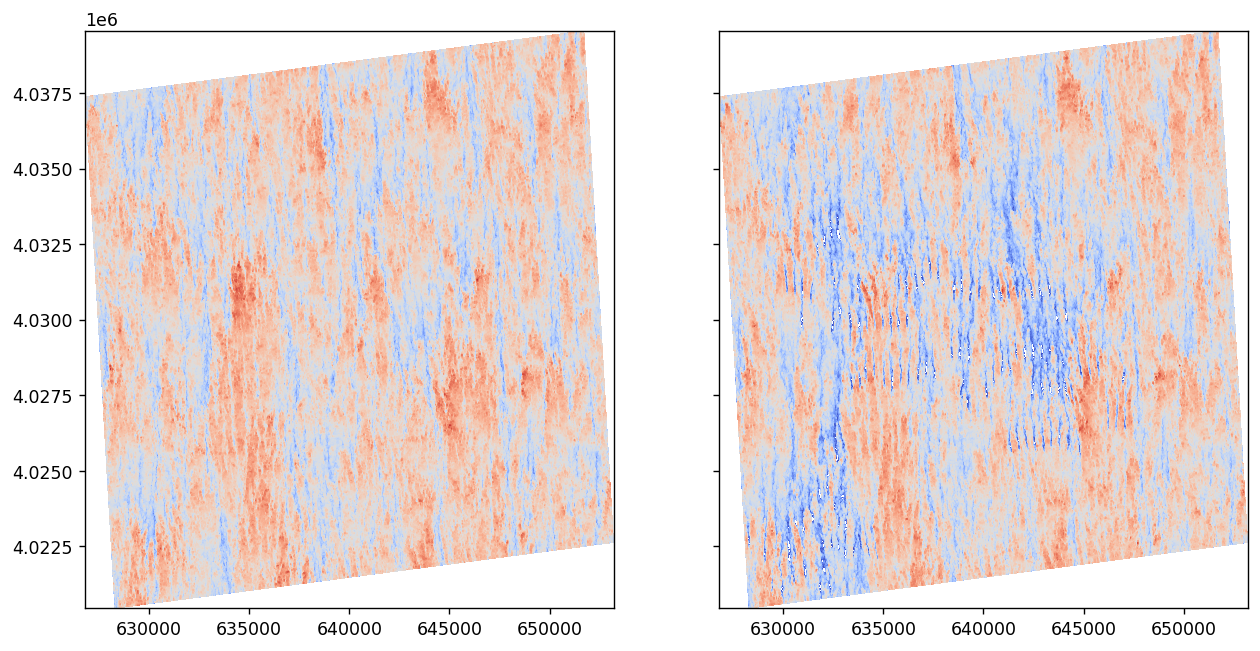

In [7]:
# Plot all farm cases
vlevels = np.linspace(5,13,101)
fieldtype = 'instantaneous'
farm      = 'KingPlains'

for data in datadefs:
    dirpath  = data['dirpath']
    fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=125, sharey=True)
    
    filename = data[farm][fieldtype]['precursorrun']['filename']
    url      = data[farm][fieldtype]['precursorrun']['url']
    fullfilename = downloadFileIfNeeded(dirpath, filename, url)    
    ax=axs[0]
    x, y, z, vx, vy, vz = loadPickle(fullfilename)
    vh = np.sqrt(vx**2 + vy**2) 
    plotv = vh if len(vh.shape)==2 else vh[0,:,:]
    c=ax.contourf(x, y, plotv, levels=vlevels, cmap='coolwarm')    
    
    filename = data[farm][fieldtype]['turbinerun']['filename']
    url      = data[farm][fieldtype]['turbinerun']['url']
    fullfilename = downloadFileIfNeeded(dirpath, filename, url)    
    ax=axs[1]
    x, y, z, vx, vy, vz = loadPickle(fullfilename)
    vh = np.sqrt(vx**2 + vy**2) 
    plotv = vh if len(vh.shape)==2 else vh[0,:,:]
    c=ax.contourf(x, y, plotv, levels=vlevels, cmap='coolwarm')
    

Found DATA_Summit_amrwind_bananasrun1/DATA_Summit_unstable_bananas1_KP_z90_noturb_mean_300_960.pkl
Found DATA_Summit_amrwind_bananasrun1/DATA_Summit_unstable_bananas1_KP_z90_wturb_mean_300_960.pkl


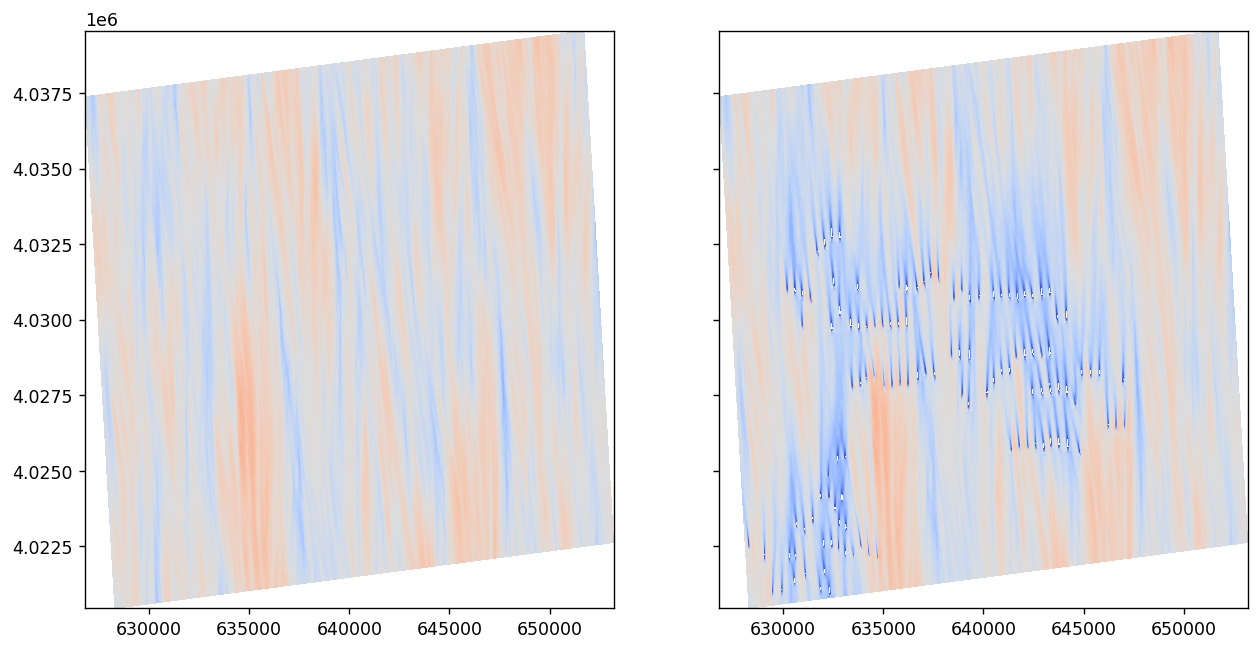

In [13]:
# Plot all farm cases
vlevels = np.linspace(5,13,101)
fieldtype = 'mean'
farm      = 'KingPlains'

for data in datadefs:
    dirpath  = data['dirpath']
    fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=125, sharey=True)
    
    filename = data[farm][fieldtype]['precursorrun']['filename']
    url      = data[farm][fieldtype]['precursorrun']['url']
    fullfilename = downloadFileIfNeeded(dirpath, filename, url)    
    ax=axs[0]
    x, y, z, vx, vy, vz = loadPickle(fullfilename)
    vh = np.sqrt(vx**2 + vy**2) 
    plotv = vh if len(vh.shape)==2 else vh[0,:,:]
    c=ax.contourf(x, y, plotv, levels=vlevels, cmap='coolwarm')    
    
    filename = data[farm][fieldtype]['turbinerun']['filename']
    url      = data[farm][fieldtype]['turbinerun']['url']
    fullfilename = downloadFileIfNeeded(dirpath, filename, url)    
    ax=axs[1]
    x, y, z, vx, vy, vz = loadPickle(fullfilename)
    vh = np.sqrt(vx**2 + vy**2) 
    plotv = vh if len(vh.shape)==2 else vh[0,:,:]
    c=ax.contourf(x, y, plotv, levels=vlevels, cmap='coolwarm')
    